In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from collections import Counter
import random
import colorsys

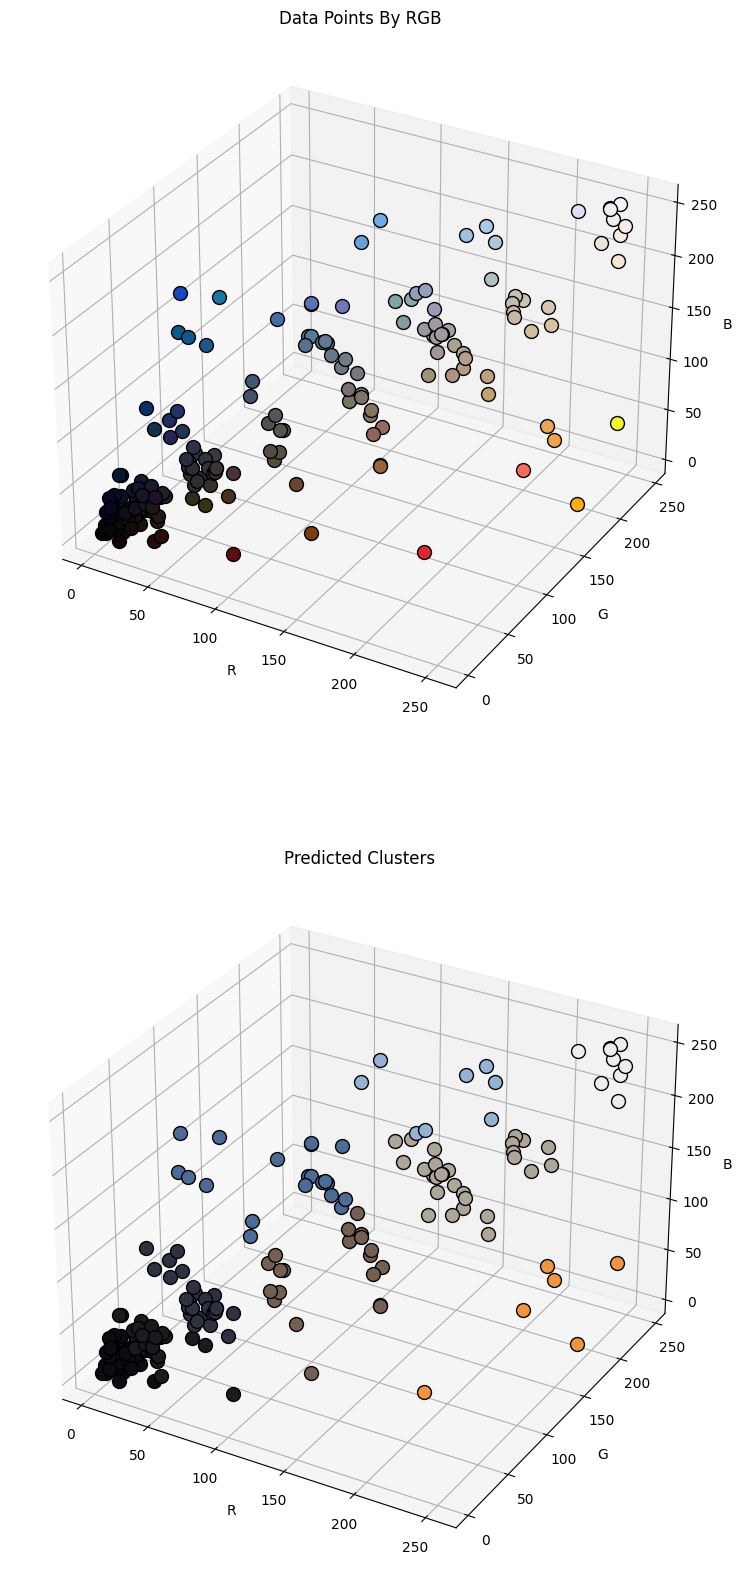

In [20]:
df = pd.read_csv("../data_sandstorm.csv")
bottom_df = df.loc[(df['name']=='Pants') | 
                   (df['name']=='Shorts') |
                   (df['name']=='Jeans')]

# save rgb values as hls values
X = []
for i, row in bottom_df.iterrows():
    rgb = [row['r'], row['g'], row['b']]
    X.append(rgb)

# # initialize kmeans class
# kmeans = KMeans(
#     init="random",
#     n_clusters=2,
#     n_init=10,
#     max_iter=300,
#     random_state=42)

# n = 5

# create dataset
# X, y = make_blobs(n_samples=200, centers=n, n_features=3,
#                   cluster_std=3.5, random_state=42)

def randColor():
    c = random.randint(0,255)/255
    return c

sil_score_max = -1 # this is the minimum possible score
best_n_clusters = 0
model = None

# for n_clusters in range(2, 10):
#     curr_model = KMeans(n_clusters = n_clusters, 
#                         init='random', 
#                         max_iter=300, 
#                         n_init=10, 
#                         random_state=42)
#     labels = curr_model.fit_predict(X)
#     sil_score = silhouette_score(X, labels)
# #     print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))
#     if sil_score > sil_score_max:
#         sil_score_max = sil_score
#         best_n_clusters = n_clusters
#         model = curr_model
# print("Best n clusters:", best_n_clusters)

n_clusters = 9

model = KMeans(n_clusters=n_clusters, 
                        init='random', 
                        max_iter=300, 
                        n_init=10, 
                        random_state=42)


# fit data and generate predictions
model.fit(X)
y_pred = model.labels_
centers = model.cluster_centers_


#plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(211, projection='3d')
ax.set_title("Data Points By RGB")
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax1 = fig.add_subplot(212, projection='3d')
ax1.set_title("Predicted Clusters")
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')

# colors_train = {0 : 'blue', 1 : 'red', 2 : 'purple', 3 : 'yellow', 4 : 'black', 5 : 'orange', 6 : 'pink'}
# colors_pred = {0 : 'green', 1 : 'brown', 2 : 'cyan', 3 : 'yellow', 4 : 'black', 5 : 'orange', 6 : 'pink'}
# colors_pred = {i : tuple(randColor() for j in range(3)) for i in range(n_clusters)}

# def classify(c):
#     hue = c[0]
#     sat = c[1]
#     lgt = c[2]

#     if (lgt < 0.2):  return "Blacks"
#     if (lgt > 0.8):  return "Whites"

#     if (sat < 0.25): return "Grays"
    
#     if ((hue>345 or hue<60) and lgt<=0.4): return "Browns"

#     if (hue < 30):   return "Reds"
#     if (hue < 90):   return "Yellows"
#     if (hue < 150):  return "Greens"
#     if (hue < 210):  return "Cyans"
#     if (hue < 270):  return "Blues"
#     if (hue < 330):  return "Magentas"
#     return "Reds"

    
color_classes = {}

for i, p in enumerate(X):
    if y_pred[i] in color_classes:
        color_classes[y_pred[i]].append(X)
    else:
        color_classes[y_pred[i]] = [X]
        
p_size = 100

for i, p in enumerate(X):
    px, py, pz = p
    c_train = np.array([x/255 for x in p]) # point color
    c_pred = np.array([x/255 for x in centers[y_pred[i]]]) # colors_pred[y_pred[i]]
        
    ax.scatter(px, py, pz, color=c_train, edgecolors='black', s=p_size)
    ax1.scatter(px, py, pz, color=c_pred, edgecolors='black', s=p_size)
    
plt.show()

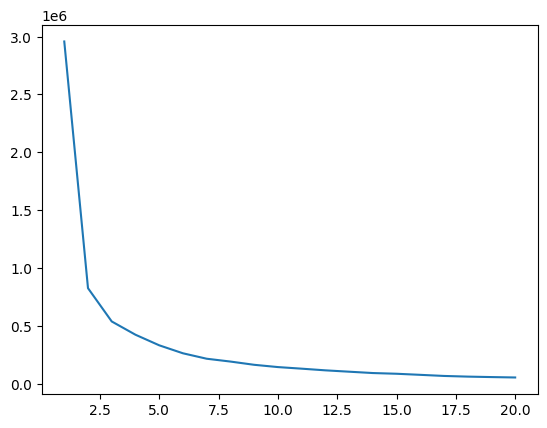

In [21]:
md=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    o = kmeans.inertia_
    md.append(o)
    
plt.plot(list(np.arange(1,21)),md)
plt.show()

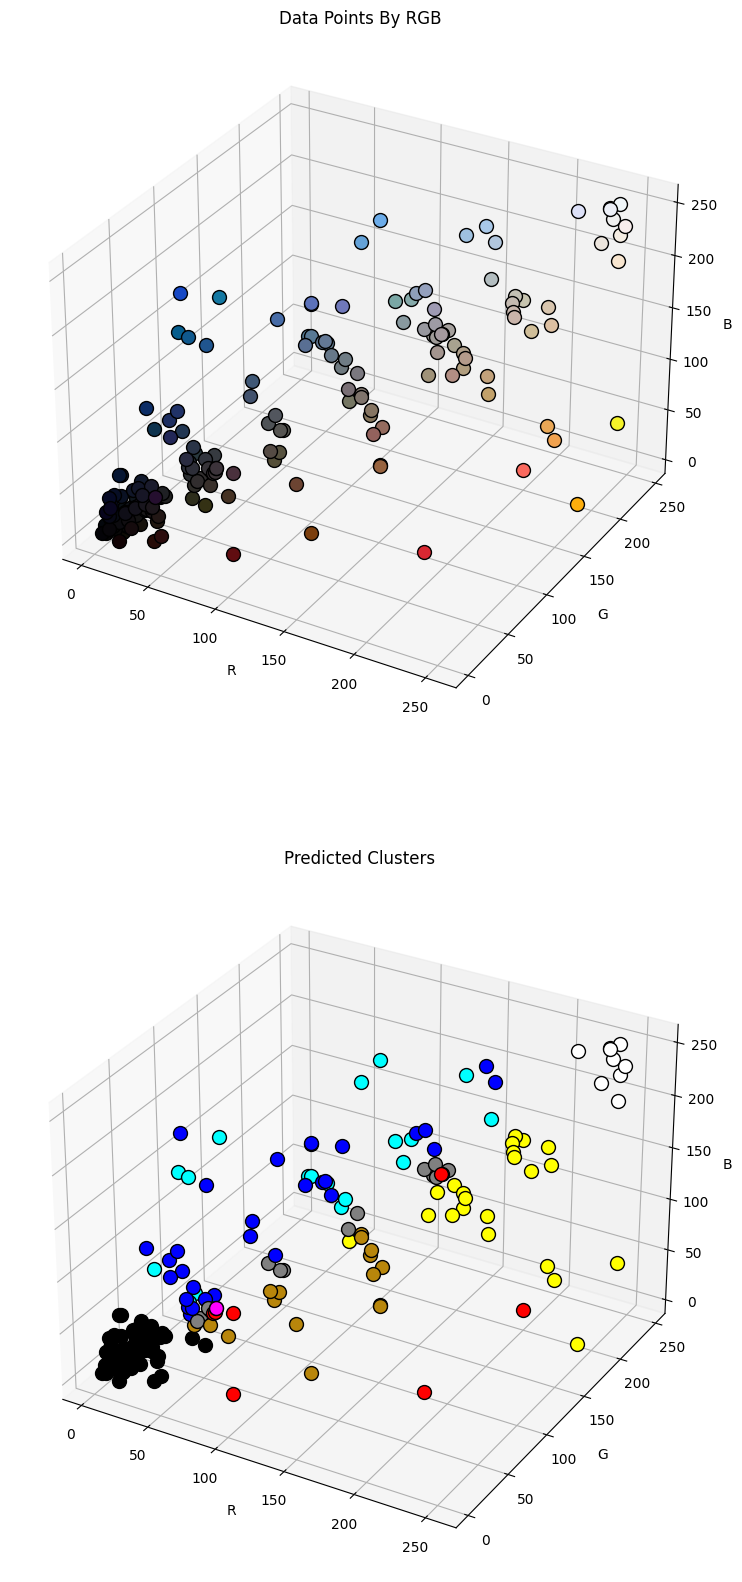

In [33]:
def classify(c):
    hue = c[0]*360
    lgt = c[1]
    sat = c[2]

    if (lgt < 0.15):  return "Blacks"
    if (lgt > 0.8):  return "Whites"

    if (sat < 0.05): return "Grays"
    
    if (hue<60 and lgt<=0.5): return "Browns"

    if (hue < 10):   return "Reds"
    if (hue < 90):   return "Yellows"
    if (hue < 150):  return "Greens"
    if (hue < 210):  return "Cyans"
    if (hue < 270):  return "Blues"
    if (hue < 330):  return "Magentas"
    
    return "Reds"

df = pd.read_csv("../data_sandstorm.csv")
bottom_df = df.loc[(df['name']=='Pants') | 
                   (df['name']=='Shorts') |
                   (df['name']=='Jeans')]

# save rgb values as hls values
X = [] # rgb
X_hls = [] # hls

for i, row in bottom_df.iterrows():
    rgb = [row['r'], row['g'], row['b']]
    rgb_norm = [x/255 for x in rgb]
    hls = colorsys.rgb_to_hls(*rgb_norm)
    X.append(rgb)
    X_hls.append(hls)
    
colors_pred = {"Blacks" : "black",
              "Whites" : "white",
              "Grays" : "gray",
              "Browns" : "darkgoldenrod",
               "Reds" : "red",
               "Yellows" : "yellow",
               "Greens" : "green",
               "Cyans" : "cyan",
               "Blues" : "blue",
               "Magentas" : "magenta",
               "Pinks" : "pink"
              }
    
y_pred = [classify(i) for i in X_hls]

# print(y_pred)
# print(X_hls)

#plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(211, projection='3d')
ax.set_title("Data Points By RGB")
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax1 = fig.add_subplot(212, projection='3d')
ax1.set_title("Predicted Clusters")
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')

for i, p in enumerate(X):
    px, py, pz = p
    c_train = np.array([x/255 for x in p]) # point color
    c_pred = colors_pred[y_pred[i]]
    ax.scatter(px, py, pz, color=c_train, edgecolors='black', s=p_size)
    ax1.scatter(px, py, pz, c=colors_pred[y_pred[i]], edgecolors='black', s=p_size)

plt.show()

In [23]:
# Count points in each cluster

print("Total data points:", len(X), '\n')

c = Counter(y_pred)
counts = c.most_common()
for t in counts:
    print(colors_pred[t[0]], t[1])
    
tup_max = max(counts, key=lambda x : x[1])
print()
print("Densest cluster:", colors_pred[tup_max[0]])

Total data points: 197 

black 105
yellow 22
blue 19
cyan 15
darkgoldenrod 13
gray 11
white 9
red 3

Densest cluster: black


In [18]:
def randColor():
    c = random.randint(0,255)/255
    return c

for i in range(10):
    print(randColor())

0.42745098039215684
0.4235294117647059
0.14901960784313725
0.8470588235294118
0.8392156862745098
0.058823529411764705
0.3215686274509804
0.6274509803921569
0.9254901960784314
0.8352941176470589


HLS CLUSTERING BELOW

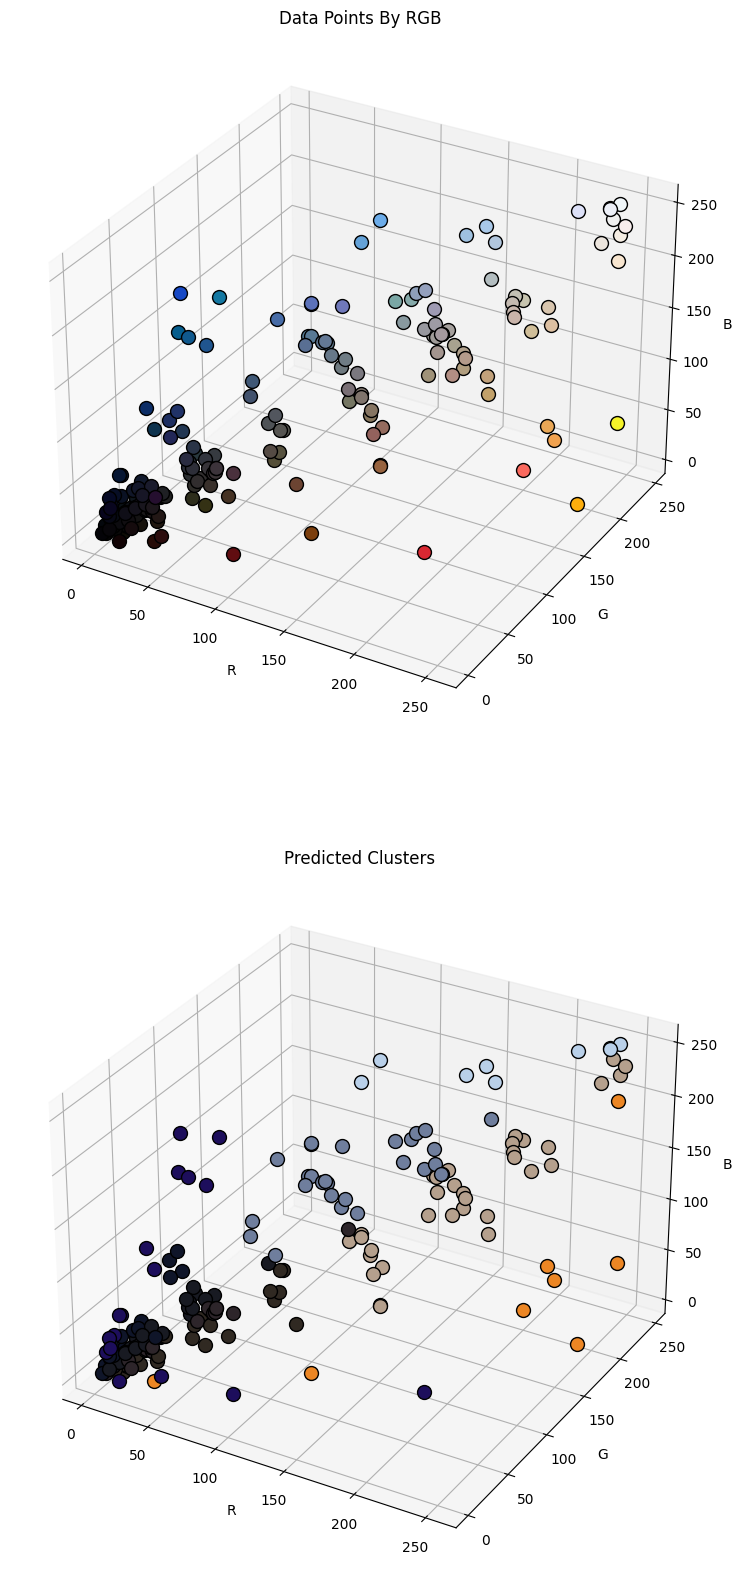

In [31]:
df = pd.read_csv("../data_sandstorm.csv")
bottom_df = df.loc[(df['name']=='Pants') | 
                   (df['name']=='Shorts') |
                   (df['name']=='Jeans')]

# save rgb values as hls values
X = []
for i, row in bottom_df.iterrows():
    rgb = [row['r'], row['g'], row['b']]
    X.append(rgb)

# # initialize kmeans class
# kmeans = KMeans(
#     init="random",
#     n_clusters=2,
#     n_init=10,
#     max_iter=300,
#     random_state=42)


X_hls = [] # hls

for color_point in X:
    pass

for i, row in bottom_df.iterrows():
    rgb = [row['r'], row['g'], row['b']]
    rgb_norm = [x/255 for x in rgb]
    hls = colorsys.rgb_to_hls(*rgb_norm)
    X_hls.append(hls)

# n = 5

# create dataset
# X, y = make_blobs(n_samples=200, centers=n, n_features=3,
#                   cluster_std=3.5, random_state=42)

def randColor():
    c = random.randint(0,255)/255
    return c

sil_score_max = -1 # this is the minimum possible score
best_n_clusters = 0
model = None



n_clusters = 9

model = KMeans(n_clusters=n_clusters, 
                        init='random', 
                        max_iter=300, 
                        n_init=10, 
                        random_state=42)


# fit data and generate predictions
model.fit(X_hls)
y_pred = model.labels_
centers = model.cluster_centers_


#plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(211, projection='3d')
ax.set_title("Data Points By RGB")
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax1 = fig.add_subplot(212, projection='3d')
ax1.set_title("Predicted Clusters")
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')

# colors_train = {0 : 'blue', 1 : 'red', 2 : 'purple', 3 : 'yellow', 4 : 'black', 5 : 'orange', 6 : 'pink'}
# colors_pred = {0 : 'green', 1 : 'brown', 2 : 'cyan', 3 : 'yellow', 4 : 'black', 5 : 'orange', 6 : 'pink'}
# colors_pred = {i : tuple(randColor() for j in range(3)) for i in range(n_clusters)}

# def classify(c):
#     hue = c[0]
#     sat = c[1]
#     lgt = c[2]

#     if (lgt < 0.2):  return "Blacks"
#     if (lgt > 0.8):  return "Whites"

#     if (sat < 0.25): return "Grays"
    
#     if ((hue>345 or hue<60) and lgt<=0.4): return "Browns"

#     if (hue < 30):   return "Reds"
#     if (hue < 90):   return "Yellows"
#     if (hue < 150):  return "Greens"
#     if (hue < 210):  return "Cyans"
#     if (hue < 270):  return "Blues"
#     if (hue < 330):  return "Magentas"
#     return "Reds"

    
color_classes = {}

# for i, p in enumerate(X):
#     if y_pred[i] in color_classes:
#         color_classes[y_pred[i]].append(X)
#     else:
#         color_classes[y_pred[i]] = [X]
        
# p_size = 100

for i, p in enumerate(X):
    px, py, pz = p
    c_train = np.array([x/255 for x in p]) # point color
    hls = ([x for x in centers[y_pred[i]]]) # colors_pred[y_pred[i]]
    rgb = colorsys.hls_to_rgb(*hls)
    c_pred = np.array([x for x in rgb])
    # print(c_pred)
    ax.scatter(px, py, pz, color=c_train, edgecolors='black', s=p_size)
    ax1.scatter(px, py, pz, color=c_pred, edgecolors='black', s=p_size)
    
plt.show()